In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import re
import string
import os

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from textblob import TextBlob

from PIL import Image, ImageDraw, ImageFont

In [2]:
df1 = pd.read_csv('tweets/search_food quality_16_07_2023.csv')
df2 = pd.read_csv('tweets/search_green hotel_16_07_2023.csv')
df3 = pd.read_csv('tweets/search_hotel_16_07_2023.csv')
df4 = pd.read_csv('tweets/search_motel_16_07_2023.csv')
df5 = pd.read_csv('tweets/search_vacation_16_07_2023.csv')

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(89, 4)
(68, 4)
(35, 4)
(58, 4)
(88, 4)


In [4]:
# join all the dataframes
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)    

print(df.shape)

(338, 4)


In [5]:
df.head()

,id,username,date,tweet
0,1680468031397412866,MartynB60,2023-07-16 06:42:54+00:00,"RT @brexcyclopaedia: This ""super duper"" trade ..."
1,1680467879286951937,Silverspectre89,2023-07-16 06:42:18+00:00,RT @Vinamralongani: Full marks to the team at ...
2,1680467538843426821,buffy2809,2023-07-16 06:40:57+00:00,@KemiBadenoch Let’s remember this when your bl...
3,1680467287806218241,gandu123_,2023-07-16 06:39:57+00:00,"@somnath1978 Better food, better neighbours, c..."
4,1680467229031428096,kamangkasming,2023-07-16 06:39:43+00:00,RT @Naveen_Srini_: 10 Habits that will make yo...


In [6]:
def clean_tweet(text):
    # remove user mentions
    text = re.sub(r'@[A-Za-z0-9]+', '', text)

    # remove hashtags
    text = re.sub(r'#', '', text)

    # remove retweets:
    text = re.sub(r'RT[\s]+', '', text)

    # remove urls
    text = re.sub(r'https?:\/\/\S+', '', text)

    # remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    # remove stop words
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(text)

    filtered_text = [word for word in word_tokens if word not in stop_words]

    filtered_text = ' '.join(filtered_text)

    return filtered_text


In [7]:
df['clean_tweet'] = df['tweet'].apply(clean_tweet)

In [8]:
df

,id,username,date,tweet,clean_tweet
0,1680468031397412866,MartynB60,2023-07-16 06:42:54+00:00,"RT @brexcyclopaedia: This ""super duper"" trade ...",This super duper trade deal worth GDP lost Bre...
1,1680467879286951937,Silverspectre89,2023-07-16 06:42:18+00:00,RT @Vinamralongani: Full marks to the team at ...,Full marks team presentation quality food onbo...
2,1680467538843426821,buffy2809,2023-07-16 06:40:57+00:00,@KemiBadenoch Let’s remember this when your bl...,Lets remember bleating climate crisis many mil...
3,1680467287806218241,gandu123_,2023-07-16 06:39:57+00:00,"@somnath1978 Better food, better neighbours, c...",Better food better neighbours cheap housekeepi...
4,1680467229031428096,kamangkasming,2023-07-16 06:39:43+00:00,RT @Naveen_Srini_: 10 Habits that will make yo...,_Srini_ Habits make smarter Exercise Meditate ...
...,...,...,...,...,...
333,1680467014878388224,MaciasShre93713,2023-07-16 06:38:52+00:00,RT @TopCryptoKungfu: #CryptoMemes \nWhy did th...,CryptoMemes Why cryptocurrency decide go vacat...
334,1680467009186967552,TVIToday,2023-07-16 06:38:51+00:00,World’s biggest cruise ship ‘Icon of the Seas’...,Worlds biggest cruise ship Icon Seas offers ul...
335,1680467000420712453,NicolaVela78400,2023-07-16 06:38:49+00:00,RT @TopCryptoKungfu: #CryptoMemes \nWhy did th...,CryptoMemes Why cryptocurrency decide go vacat...
336,1680466990333583360,HuffPost,2023-07-16 06:38:46+00:00,"""No president is ever on vacation,"" argued the...",No president ever vacation argued CNN host poi...


In [9]:
# sentiment analysis
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['clean_tweet'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweet'].apply(getPolarity)



In [10]:
# negative tweets
df_negative = df[df['Polarity'] < 0]
df_negative

,id,username,date,tweet,clean_tweet,Subjectivity,Polarity
7,1680466802919505920,yash_sonii,2023-07-16 06:38:02+00:00,@burgerkingindia Hello I Ordered Food Via Zoma...,Hello I Ordered Food Via Zomato In Burger King...,0.780000,-0.520000
8,1680466703870828544,Stellafeng12,2023-07-16 06:37:38+00:00,Food grade kraft board + PE/PLA coating. (sin...,Food grade kraft board PEPLA coating single do...,0.071429,-0.023810
14,1680464395674042369,SoonBeHome,2023-07-16 06:28:28+00:00,"RT @snigskitchen: ""EU membership vastly improv...",EU membership vastly improved quality diet liv...,0.800000,-0.200000
16,1680463461468479488,DragonWong2024,2023-07-16 06:24:45+00:00,"@TripInChina I will pay, at least once, for ha...",I pay least dynasticstyle experience And frank...,0.400000,-0.300000
17,1680462216909185024,AsNicoleSeesIt,2023-07-16 06:19:48+00:00,"RT @snigskitchen: ""EU membership vastly improv...",EU membership vastly improved quality diet liv...,0.800000,-0.200000
...,...,...,...,...,...,...,...
299,1680467442894528512,salamibae,2023-07-16 06:40:34+00:00,sleeping in the car on the way to vacation is ...,sleeping car way vacation realising u deal jum...,0.500000,-0.500000
301,1680467431800688641,angellove727,2023-07-16 06:40:31+00:00,@SoapOperaSpy This is so dumb. I used to be a ...,This dumb I used fan Carly Now I cant stand Th...,0.700000,-0.587500
309,1680467293543751681,TheMobRules73,2023-07-16 06:39:59+00:00,RT @matjendav4: Disgraceful ~ ~ Biden takes no...,Disgraceful Biden takes questions fails salute...,0.300000,-0.500000
316,1680467170168393728,lamisscherrie,2023-07-16 06:39:29+00:00,RT @TFankawaii: That frame from the Cow &amp; ...,That frame Cow amp Chicken Japanese Vacation c...,0.279167,-0.183333


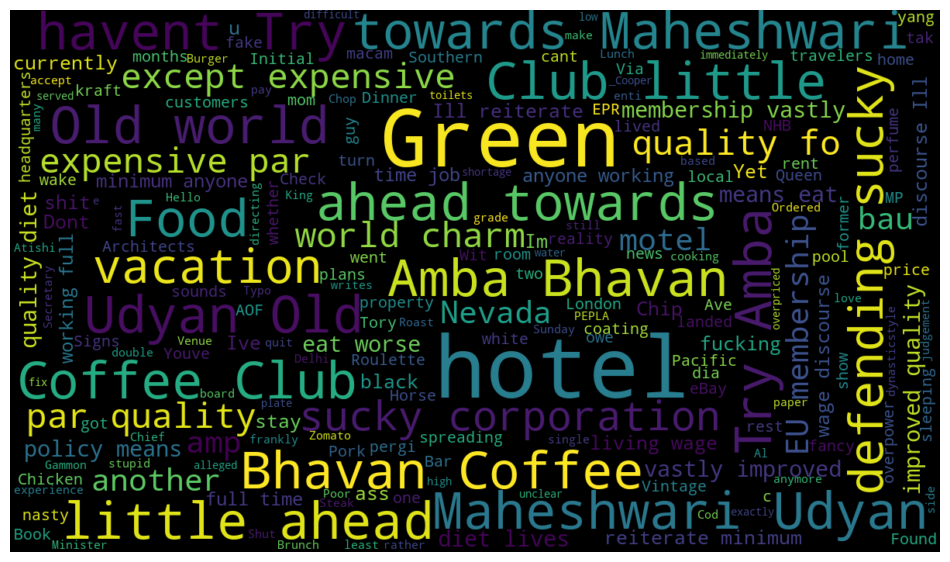

In [15]:
# word cloud only for negative tweets
all_words = ' '.join([text for text in df_negative['clean_tweet']])
wc = WordCloud(stopwords=STOPWORDS, width=1200, height=700, random_state=21, max_font_size=110).generate(all_words)

fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 

In [18]:
import plotly.express as px

In [19]:
# sentiment bar chart
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

px.bar(df, x='Analysis', y=df.index, color='Analysis', title='Sentiment Analysis')